# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### jay notes - assignments to look at
* api day 2, #5 airport_ratings

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a skeleton dataframe with the cities list. 
# Add columns for: City, Lat, Lng, Max, Temp, Humidity, Cloudiness, Wind, Speed, Country, Date
# Create a dataframe with the Cities list adn then append that datafame with new empty columns desired

df = pd.DataFrame(cities)
df["Latitude"] = ""
df["Longitude"] = ""
df["Max Temp (F)"] = ""
df["Humidity"] = ""
df["Cloud Coverage"] = ""
df["Wind Speed"] = ""
df["Country"] = ""
df["Datetime"] = ""

# rename the column name '0' as 'City'
df.rename(columns={0 : 'City'}, inplace=True)

In [4]:
# use the following site to pull the calls https://openweathermap.org/current
# api call url - api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
# create a shell df with columns for City Lat Lng Max Temp Humidity Cloudiness Wind Speed Country Date
# option1 - create shell lists for each of the columns then combine then below into a df
# option2 - figure out how to populate dataframe with the for loop method using .iterrows() 
city_num = 1

print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# Using option 2 - I wanted to test using .iterrows() to populate the data frame skeleton I created above
for index, row in df.iterrows():
    base_url = f"https://api.openweathermap.org/data/2.5/weather?q={row['City']}&appid={weather_api_key}&units=imperial"
    query_data = requests.get(base_url).json()
    
    try:
        print(f"Processing record {city_num} out of {len(cities)} | {row['City']} | {query_data['main']['temp']}")
        
        df.loc[index, 'Latitude'] = query_data['coord']['lat']
        df.loc[index, 'Longitude'] = query_data['coord']['lon']
        df.loc[index, 'Max Temp (F)'] = query_data['main']['temp_max']
        df.loc[index, 'Humidity'] = query_data['main']['humidity']
        df.loc[index, 'Cloud Coverage'] = query_data['clouds']['all']
        df.loc[index, 'Wind Speed'] = query_data['wind']['speed']
        df.loc[index, 'Country'] = query_data['sys']['country']
        df.loc[index, 'Datetime'] = query_data['dt']
        
        city_num += 1     
    except:
        print("City not found.")
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 out of 599 | namatanai | 81.28
Processing record 2 out of 599 | severo-kurilsk | 50.95
Processing record 3 out of 599 | cabo san lucas | 84
Processing record 4 out of 599 | busselton | 63.99
Processing record 5 out of 599 | husavik | 50
Processing record 6 out of 599 | wanaka | 34.7
Processing record 7 out of 599 | alofi | 73.4
Processing record 8 out of 599 | sitka | 55.4
Processing record 9 out of 599 | bethel | 70.41
Processing record 10 out of 599 | vaini | 71.6
Processing record 11 out of 599 | siyabuswa | 46.99
Processing record 12 out of 599 | dutse | 73.26
Processing record 13 out of 599 | chuy | 41.52
Processing record 14 out of 599 | auki | 82.65
Processing record 15 out of 599 | labuan | 86.88
City not found.
Processing record 16 out of 599 | carnarvon | 78.8
Processing record 17 out of 599 | hasaki | 74.21
Processing record 18 out of 599 | mataura | 41.23
Processing rec

Processing record 157 out of 599 | nome | 63.09
Processing record 158 out of 599 | bengkulu | 81.68
Processing record 159 out of 599 | boguchany | 78.17
Processing record 160 out of 599 | berlevag | 48.2
Processing record 161 out of 599 | santa marta | 73.99
Processing record 162 out of 599 | vila velha | 64.2
Processing record 163 out of 599 | san cristobal | 64.06
Processing record 164 out of 599 | lavrentiya | 45.19
Processing record 165 out of 599 | cape town | 53.69
Processing record 166 out of 599 | bandarbeyla | 87.26
Processing record 167 out of 599 | mocajuba | 73.44
Processing record 168 out of 599 | vila do maio | 73.4
Processing record 169 out of 599 | karratha | 78.3
Processing record 170 out of 599 | oranjestad | 82.4
Processing record 171 out of 599 | barguzin | 76.75
City not found.
Processing record 172 out of 599 | padang | 78.22
Processing record 173 out of 599 | norrtalje | 60.67
Processing record 174 out of 599 | liman | 76.48
Processing record 175 out of 599 | pis

Processing record 310 out of 599 | codrington | 54.99
Processing record 311 out of 599 | shirvan | 87.78
Processing record 312 out of 599 | payson | 75.2
Processing record 313 out of 599 | urusha | 95.92
City not found.
Processing record 314 out of 599 | egvekinot | 54.99
Processing record 315 out of 599 | lugovoy | 85.69
Processing record 316 out of 599 | grindavik | 48.2
Processing record 317 out of 599 | moulins | 55.42
Processing record 318 out of 599 | arica | 51.82
Processing record 319 out of 599 | zhigansk | 63.68
Processing record 320 out of 599 | teguldet | 80.33
Processing record 321 out of 599 | ifanadiana | 67.51
Processing record 322 out of 599 | kloulklubed | 80.6
Processing record 323 out of 599 | miri | 85.01
Processing record 324 out of 599 | champerico | 78.94
City not found.
Processing record 325 out of 599 | sambava | 73.15
Processing record 326 out of 599 | menongue | 48.69
Processing record 327 out of 599 | katsuura | 72.41
Processing record 328 out of 599 | bloe

Processing record 466 out of 599 | anadyr | 51.35
Processing record 467 out of 599 | havelock | 79.32
Processing record 468 out of 599 | qaqortoq | 51.8
Processing record 469 out of 599 | kodinsk | 79.39
Processing record 470 out of 599 | amahai | 79.83
Processing record 471 out of 599 | karaidel | 79.79
Processing record 472 out of 599 | inuvik | 57.2
Processing record 473 out of 599 | vawkavysk | 55.4
Processing record 474 out of 599 | birao | 72.19
Processing record 475 out of 599 | lodwar | 81.7
Processing record 476 out of 599 | wencheng | 83.14
Processing record 477 out of 599 | ostersund | 46.4
Processing record 478 out of 599 | meulaboh | 85.86
Processing record 479 out of 599 | kysyl-syr | 76.03
Processing record 480 out of 599 | herat | 93.2
Processing record 481 out of 599 | cobija | 70.56
Processing record 482 out of 599 | dubti | 92.57
Processing record 483 out of 599 | soure | 78.73
City not found.
Processing record 484 out of 599 | nouadhibou | 71.6
Processing record 485

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Need to clean the data of the empty cells, it messes up calculations later on if you don't because you can't use a bool on a string (the empty cells)
df['Humidity'] = df['Humidity'].replace('', np.nan)
city_df = df.dropna()
city_df.shape

(561, 9)

In [6]:
# Display the cities weather dataframe pulled from the live API data
city_df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,namatanai,-3.67,152.43,81.28,79.0,99,3.87,PG,1594621403
1,severo-kurilsk,50.68,156.12,50.95,84.0,98,10.83,RU,1594621403
2,cabo san lucas,22.89,-109.91,84,63.0,71,9.13,MX,1594621404
3,busselton,-33.65,115.33,66,46.0,73,18.41,AU,1594621404
4,husavik,66.04,-17.34,50,100.0,75,2.24,IS,1594621404
...,...,...,...,...,...,...,...,...,...
594,eyemouth,55.87,-2.09,57.99,86.0,92,4,GB,1594621631
595,corumba,-19.01,-57.65,72.61,72.0,13,1.72,BR,1594621631
596,yangjiang,21.85,111.97,89.4,66.0,28,8.37,CN,1594621632
597,hit,33.64,42.83,96.42,24.0,0,15.97,IQ,1594621632


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Created a new dataframe variable called clean_city_df pulling the Humidity over 100 with a boolean
# Used .reset_index() to reset the index numbers and used parameter drop=true so no new column is made
clean_city_df = city_df[(city_df["Humidity"] <= 100)]
clean_city_df = clean_city_df.reset_index(drop=True)
clean_city_df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,namatanai,-3.67,152.43,81.28,79.0,99,3.87,PG,1594621403
1,severo-kurilsk,50.68,156.12,50.95,84.0,98,10.83,RU,1594621403
2,cabo san lucas,22.89,-109.91,84,63.0,71,9.13,MX,1594621404
3,busselton,-33.65,115.33,66,46.0,73,18.41,AU,1594621404
4,husavik,66.04,-17.34,50,100.0,75,2.24,IS,1594621404
...,...,...,...,...,...,...,...,...,...
556,eyemouth,55.87,-2.09,57.99,86.0,92,4,GB,1594621631
557,corumba,-19.01,-57.65,72.61,72.0,13,1.72,BR,1594621631
558,yangjiang,21.85,111.97,89.4,66.0,28,8.37,CN,1594621632
559,hit,33.64,42.83,96.42,24.0,0,15.97,IQ,1594621632


In [8]:
# Export the City_Data into a csv
# exported data to current folder using .to_csv() with parameter index=False so that index isn't written into csv (default is True)
clean_city_df.to_csv('weather_raw_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This code plots the 'Max Temp (F)' vs the 'Latitude' columns from the dataframe. It shows that as we go further from the equator (away from 0 +/-) the temperatures drop.


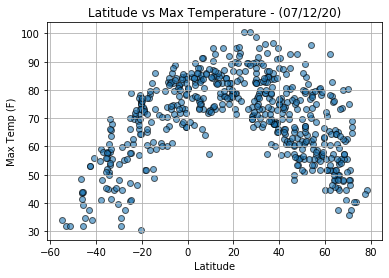

In [9]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Max Temp' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Max Temp (F)'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Max Temperature - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("Fig1_Lat_v_Temp.png")

print(f"This code plots the 'Max Temp (F)' vs the 'Latitude' columns from the dataframe. It shows that as we go further from the equator (away from 0 +/-) the temperatures drop.")

## Latitude vs. Humidity Plot

This code plots the 'Humidity (%)' vs the 'Latitude' columns from the dataframe. It shows that as we approach the latitudes of 40 and -40 there's a higher likelihood that humidity will drop.


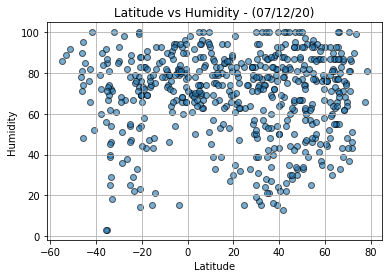

In [10]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Humidity' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Humidity'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Humidity - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Fig2_Lat_v_Hum.png")

print(f"This code plots the 'Humidity (%)' vs the 'Latitude' columns from the dataframe. It shows that as we approach the latitudes of 40 and -40 there's a higher likelihood that humidity will drop.")

## Latitude vs. Cloudiness Plot

This code plots the 'Cloud Coverage' vs the 'Latitude' columns from the dataframe. It shows that there tends to be more cloud coverage in the northern hemisphere.


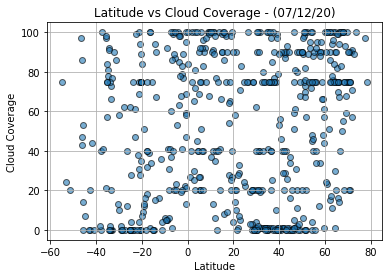

In [11]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Cloud Coverage' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Cloud Coverage'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Cloud Coverage - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.grid()
plt.savefig("Fig3_Lat_v_Cloud.png")

print(f"This code plots the 'Cloud Coverage' vs the 'Latitude' columns from the dataframe. It shows that there tends to be more cloud coverage in the northern hemisphere.")

## Latitude vs. Wind Speed Plot

This code plots the 'Wind Speed' vs the 'Latitude' columns from the dataframe. It shows that wind speeds isn't much affected by latitude.


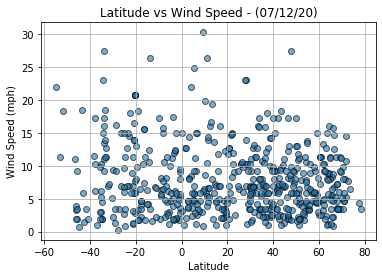

In [12]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Cloud Coverage' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Wind Speed'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Wind Speed - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Fig4_Lat_v_Wind.png")

print(f"This code plots the 'Wind Speed' vs the 'Latitude' columns from the dataframe. It shows that wind speeds isn't much affected by latitude.")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
# This function will automatically calculate, graph, and print the values desired. It will take inputs for each type of graph. 
def regress_func(x_axis, y_axis, xlabel, ylabel, table_name, fig_name):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    line = slope*x_axis+intercept
    plt.scatter(x_axis, y_axis, alpha=.6, edgecolor='black')
    plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(table_name)
    plt.legend()
    plt.grid()
    plt.savefig(fig_name)
    print(f"The R-squared value is {rvalue*rvalue}")

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = (clean_city_df.loc[clean_city_df['Latitude'] > 0])
southern_df = (clean_city_df.loc[clean_city_df['Latitude'] <= 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.4149985483694021


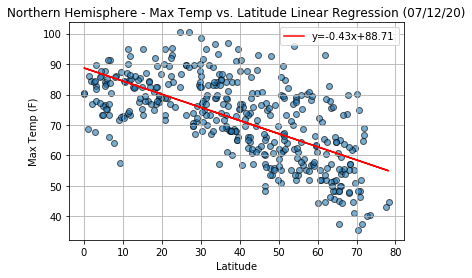

In [15]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Max Temp (F)'].astype(float), "Latitude",
             "Max Temp (F)", f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})", "Fig5_NH_Lat_v_Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.5928217265103195


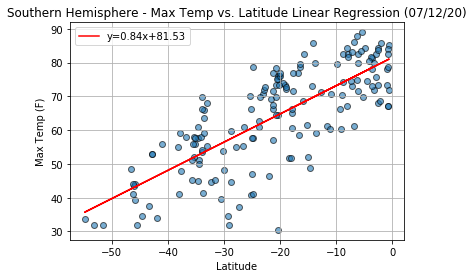

In [16]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Max Temp (F)'].astype(float), "Latitude",
             "Max Temp (F)", f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig6_SH_Lat_v_Temp")

# Analysis - Latitude vs Max Temps

These linear regressions are modeling the relationships of latitudes with temperatures. We see that there is a distinct correlation with max temps and the distance from the equator. The R-squared value which shows the red line and the variability of the data points in relation to it. The R-values indicate that the regression line shows a correlation between latitude and temperatures. This is primarily because the sun is closes to the equator and furthest from the poles of the earth.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.002354472989698575


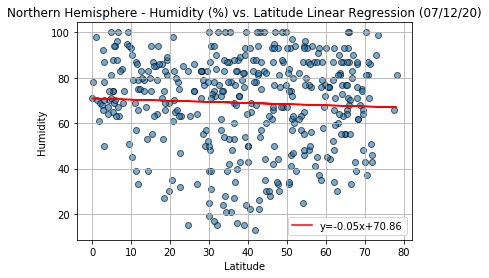

In [17]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig7_NH_Lat_v_Hum")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.015277245664107484


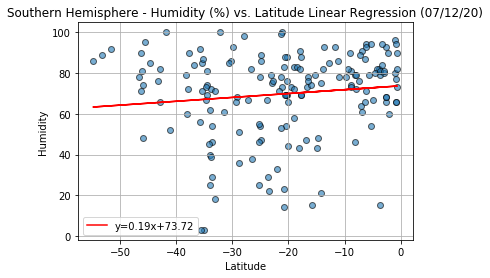

In [18]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig8_SH_Lat_v_Hum")

# Analysis - Latitude vs Humidity

These linear regressions are modeling the relationships of latitudes with humidity. We see that there is a weak correlation with humidity and latitudes. The R-squared value which shows the red line and the variability of the data points in relation to it. The R-values indicate that the regression line shows high variablity between the linear regression line and the datapoints. There tends to be a slight increase in humidity as you approach the equator which can explain why virigin daqueris in the Phillippines collects more condensation than in Anchorage.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.010120802863693842


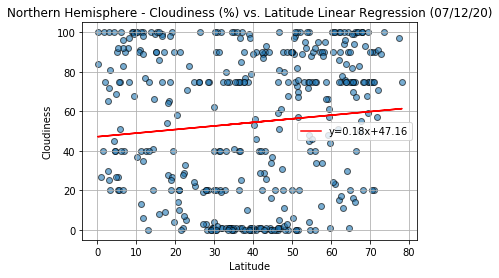

In [19]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Cloud Coverage'].astype(float), "Latitude",
             "Cloudiness", f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig9_NH_Lat_v_Cloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.029269635720562903


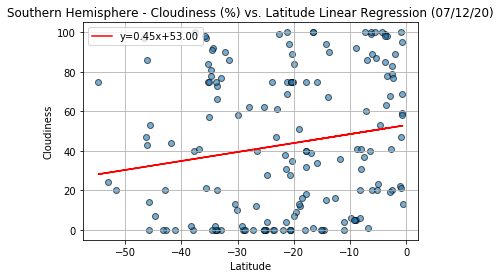

In [20]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Cloud Coverage'].astype(float), "Latitude",
             "Cloudiness", f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig10_SH_Lat_v_Cloud")

# Analysis - Latitude vs Cloudiness

These linear regressions are modeling the relationships of latitudes with cloud coverage. We see that there is pretty much no correlation with cloud coverage and latitudes. The R-squared value which shows the red line and the variability of the data points in relation to it. The R-values indicate that the regression line shows high variablity between the linear regression line and the datapoints. The conclusion from the data and the graph indicates that there isn't a relationship betwen these two data sets. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.008104387290008671


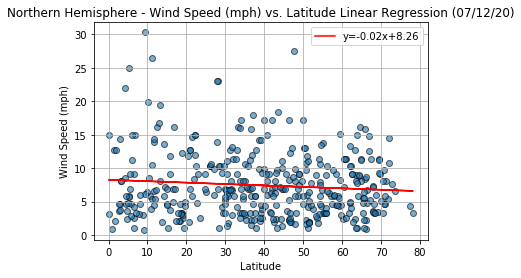

In [21]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig11_NH_Lat_v_Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.01799607548506451


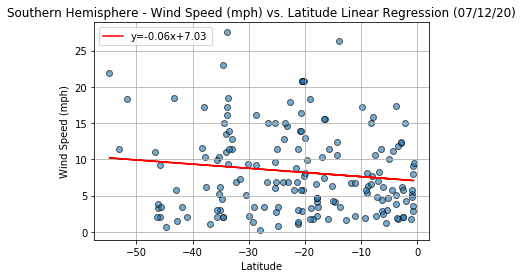

In [22]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "Fig12_SH_Lat_v_Wind")

# Analysis - Latitude vs Wind Speed

These linear regressions are modeling the relationships of latitudes with wind speeds. We see that there is pretty much no correlation with wind speeds and latitudes. The R-squared value which shows the red line and the variability of the data points in relation to it. The R-values indicate that the regression line shows high variablity between the linear regression line and the datapoints. The conclusion from the data and the graph indicates that there isn't a relationship betwen these two data sets. 